# Import modules

In [1]:
import requests
import pandas as pd
import pickle
from bs4 import BeautifulSoup

# Open your text file and combine the paragraphs

In [2]:
file = open("your_text_file_name_here.txt","r", encoding='utf8') 
text = '\n'.join(file)
print(text)

The person who was first brave enough to look me in the eyes and say these words, no matter what it could cost him, shall not be named. This moment is not his labor, It’s mine. It’s yours. 



This moment is the moment for white people, and when I say white people I mean if you’ve got white or light skin in America, no matter what your lineage, I’m saying white – this moment is the moment for white people in America to reckon with ourselves. To reckon with our part in ignoring white supremacy, which means the very same thing as perpetuating white supremacy. To reckon with how many, many different ways we benefit from our privilege, at the cost of the livelihoods, health, safety, and actual lives of black people. We have been granted 400+ years of moments like this to put an end to white supremacy in America, and here we are still, looking at the lynching of a black man, and the continued lynching of so many more black people before George Floyd, and still centering OUR feelings. Our ne

# Cleaning the text

In [3]:
# Make text lowercase, remove the name, remove text in square brackets, remove punctuation and remove words containing numbers.
import re
import string

def clean_text_round1(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

# Check the result

In [4]:
round1 = clean_text_round1(text)
print(round1)

the person who was first brave enough to look me in the eyes and say these words no matter what it could cost him shall not be named this moment is not his labor it’s mine it’s yours 



this moment is the moment for white people and when i say white people i mean if you’ve got white or light skin in america no matter what your lineage i’m saying white – this moment is the moment for white people in america to reckon with ourselves to reckon with our part in ignoring white supremacy which means the very same thing as perpetuating white supremacy to reckon with how many many different ways we benefit from our privilege at the cost of the livelihoods health safety and actual lives of black people we have been granted  years of moments like this to put an end to white supremacy in america and here we are still looking at the lynching of a black man and the continued lynching of so many more black people before george floyd and still centering our feelings our needs 



“i want to reopen”


# More cleaning if necessary, e.g.,

In [5]:
# Get rid of some additional punctuation and non-sensical text that was missed the first time around.
def clean_text_round2(text):
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('\n', '', text)
    return text

# Check again

In [6]:
round2 = clean_text_round2(round1)
print(round2)

the person who was first brave enough to look me in the eyes and say these words no matter what it could cost him shall not be named this moment is not his labor its mine its yours this moment is the moment for white people and when i say white people i mean if youve got white or light skin in america no matter what your lineage im saying white – this moment is the moment for white people in america to reckon with ourselves to reckon with our part in ignoring white supremacy which means the very same thing as perpetuating white supremacy to reckon with how many many different ways we benefit from our privilege at the cost of the livelihoods health safety and actual lives of black people we have been granted  years of moments like this to put an end to white supremacy in america and here we are still looking at the lynching of a black man and the continued lynching of so many more black people before george floyd and still centering our feelings our needs i want to reopeni want to make 

# Save the contents as a text file with pickled data

In [7]:
f = open('whatever_the_name_you_like.txt','wb')
pickle.dump(round2, f)
f.close()

# Load the pickled files

In [8]:
data = open("whatever_the_name_you_like.txt", "r")

In [9]:
import pandas as pd
pd.set_option('max_colwidth',150)

data_df = pd.DataFrame.from_dict(data).transpose()
data_df.columns = ['transcript']
data_df = data_df.sort_index()
data_df

,transcript
0,€X-  the person who was first brave enough to look me in the eyes and say these words no matter what it could cost him shall not be named this m...


# Make a dataframe with what we've got.

# Convert the dataframe into a document-term matrix

In [10]:
# Also, exclude common words English stop words from the index. 

from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english')
data_cv = cv.fit_transform(data_df.transcript)
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_dtm.index = data_df.index
data_dtm

,accomplished,acknowledge,acknowledgment,act,action,actionable,actual,address,advancing,ahead,...,workbut,workers,working,worried,written,year,years,york,young,youve
0,1,1,1,1,4,1,1,1,1,1,...,1,1,1,1,1,1,1,4,1,1


# Pickle the data

In [11]:
import pickle
data_dtm.to_pickle("dtm.pkl")
data_df.to_pickle('df.pkl')
pickle.dump(cv, open("cv.pkl", "wb"))

# Transpose the data for easy manipulation

In [12]:
data = pd.read_pickle('dtm.pkl')
data = data.transpose()
data.head()

,0
accomplished,1
acknowledge,1
acknowledgment,1
act,1
action,4


# Find the top 30 words used

# Create word clouds

In [14]:
# To download a necessary module, open command prompt and run the comand "conda install -c conda-forge wordcloud"
from wordcloud import WordCloud
wc = WordCloud(background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

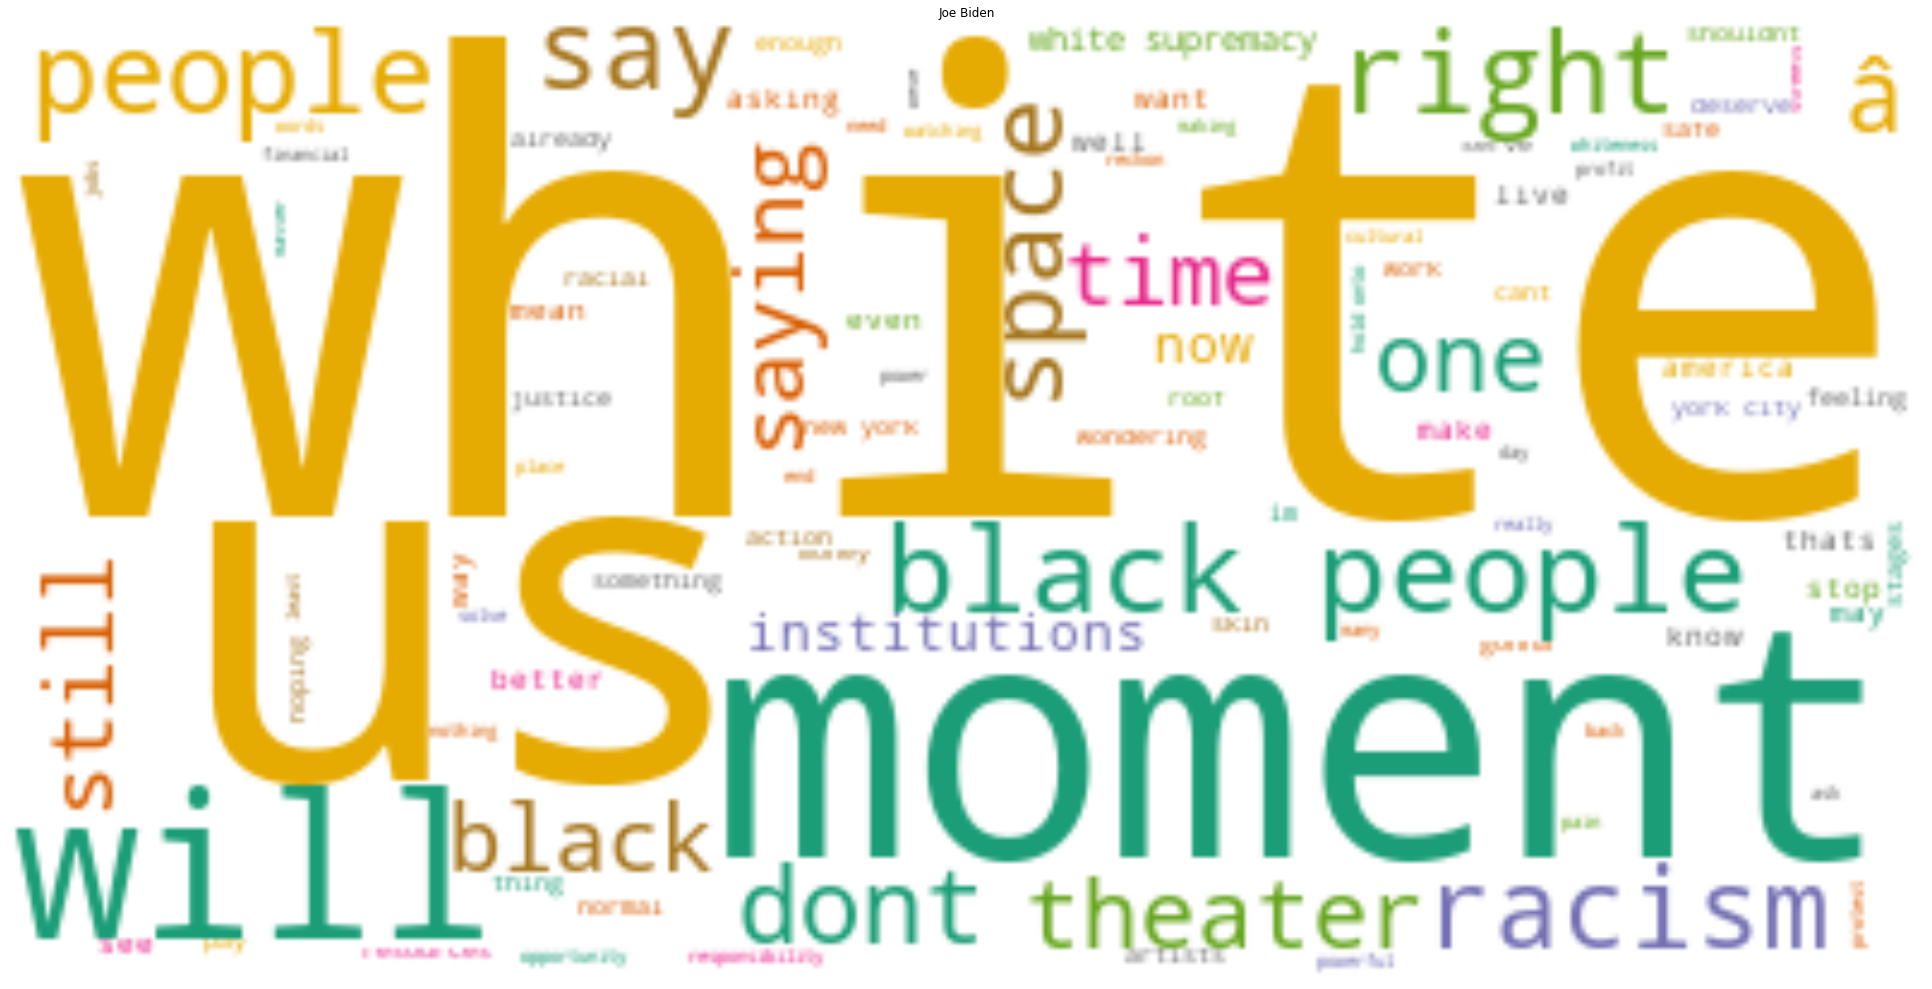

In [16]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [160, 60]

full_names = ['Joe Biden', 'Donald Trump']

# Create subplots for each
for index, name in enumerate(data.columns):
    wc.generate(data_df.transcript[name])
    
    plt.subplot(3, 4, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(full_names[index])

plt.savefig("figure.png")
plt.show()